### Student Information
Name: 蔡佳靜

Student ID: 108070027

GitHub ID: Paulineeeeeeee

Kaggle name:China Ching

Kaggle private scoreboard snapshot: 

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

In [2]:
### Begin Assignment Here

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
1621,20764,@BigLepley @angela31694996 @TheIndigoArrow Wan...,fear,0.396
2131,30127,Thanks for making our Mass with Fr. Vallely re...,joy,0.720
3066,40239,Theyve substituted the hood for a badge and gu...,sadness,0.604
2335,30331,Catering channel's at the height technics hear...,joy,0.542
1946,21089,@Zen1dfabflake You are all our angelic comrades!,fear,0.188


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


## Exercise 1 (Take home):
1. check the missing value and duplicate
2. get the countvect
3. get the frequecy according the the count data
4. build a new data frame with the frequecy and its data
5. sort the dataframe by the frequecy
6. plot the graph by the dataframe

In [11]:
import nltk
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
# Answer here
# check missing value
train_df.isnull().sum()
test_df.isnull().sum()
# check the duplicate
sum(train_df.duplicated())
sum(test_df.duplicated())

0

In [13]:
# feature creation train
train_df['unigrams'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x))
train_df["unigrams"]
count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix
print(train_counts[0])

  (0, 7777)	1
  (0, 5981)	1
  (0, 8927)	1
  (0, 3838)	1


In [14]:
# frquency
term_frequencies = []
for j in range(0,train_counts.shape[1]):
    term_frequencies.append(sum(train_counts[:,j].toarray()))

term_frequencies = np.asarray(train_counts.sum(axis=0))[0]
term_frequencies[0]

2

[Text(0, 0, 'the'),
 Text(1, 0, 'to'),
 Text(2, 0, 'and'),
 Text(3, 0, 'you'),
 Text(4, 0, 'of'),
 Text(5, 0, 'is'),
 Text(6, 0, 'it'),
 Text(7, 0, 'in'),
 Text(8, 0, 'that'),
 Text(9, 0, 'my'),
 Text(10, 0, 'for'),
 Text(11, 0, 'on'),
 Text(12, 0, 'be'),
 Text(13, 0, 'me'),
 Text(14, 0, 'this'),
 Text(15, 0, 'so'),
 Text(16, 0, 'have'),
 Text(17, 0, 'not'),
 Text(18, 0, 'just'),
 Text(19, 0, 'but'),
 Text(20, 0, 'with'),
 Text(21, 0, 'at'),
 Text(22, 0, 'can'),
 Text(23, 0, 'all'),
 Text(24, 0, 'like'),
 Text(25, 0, 'are'),
 Text(26, 0, 'your'),
 Text(27, 0, 'was'),
 Text(28, 0, 'when'),
 Text(29, 0, 'if')]

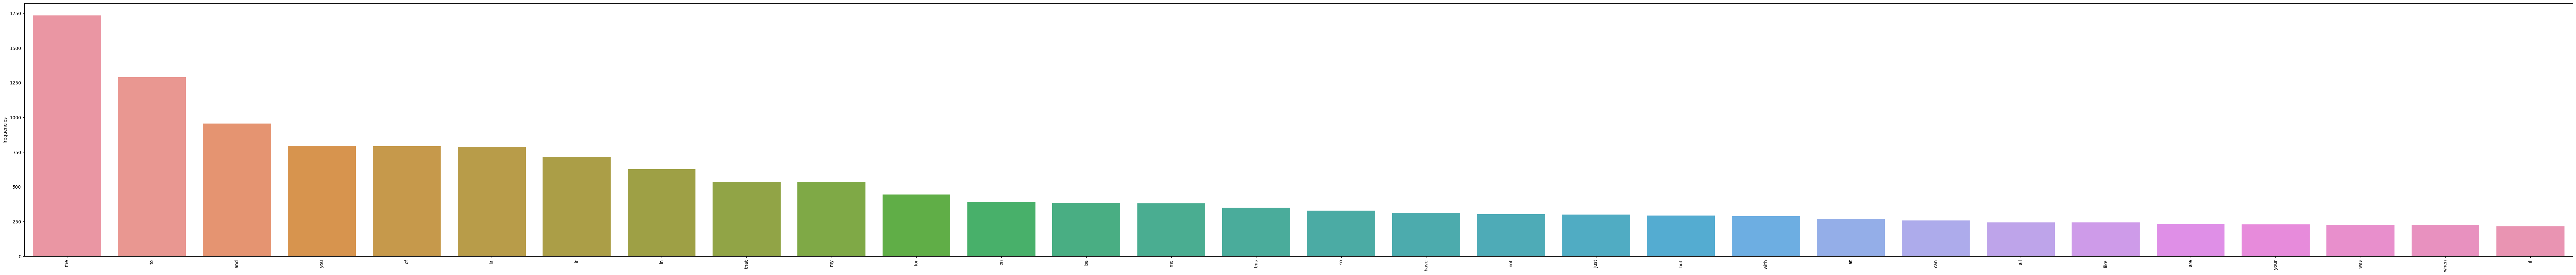

In [15]:
new_dataframe = pd.DataFrame(term_frequencies,
            index = count_vect.get_feature_names_out(),
            columns=['frequencies'])
# sort the data
new_dataframe = new_dataframe.sort_values(by = ['frequencies'],ascending=False)[0:30]
# draw
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=new_dataframe.index, 
            y=new_dataframe["frequencies"])
g.set_xticklabels(new_dataframe.index, rotation = 90)

In [16]:
# feature creation test
test_df['unigrams'] = test_df['text'].apply(lambda x: dmh.tokenize_text(x))
test_df["unigrams"]
count_vect_test = CountVectorizer()
test_counts = count_vect_test.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix
print(test_counts[0])

  (0, 7777)	1
  (0, 5981)	1
  (0, 8927)	1
  (0, 3838)	1


In [17]:
# frquency
term_frequencies_test = []
for j in range(0,test_counts.shape[1]):
    term_frequencies_test.append(sum(test_counts[:,j].toarray()))

term_frequencies_test = np.asarray(test_counts.sum(axis=0))[0]
term_frequencies_test[0]

2

[Text(0, 0, 'the'),
 Text(1, 0, 'to'),
 Text(2, 0, 'and'),
 Text(3, 0, 'you'),
 Text(4, 0, 'of'),
 Text(5, 0, 'is'),
 Text(6, 0, 'it'),
 Text(7, 0, 'in'),
 Text(8, 0, 'that'),
 Text(9, 0, 'my'),
 Text(10, 0, 'for'),
 Text(11, 0, 'on'),
 Text(12, 0, 'be'),
 Text(13, 0, 'me'),
 Text(14, 0, 'this'),
 Text(15, 0, 'so'),
 Text(16, 0, 'have'),
 Text(17, 0, 'not'),
 Text(18, 0, 'just'),
 Text(19, 0, 'but'),
 Text(20, 0, 'with'),
 Text(21, 0, 'at'),
 Text(22, 0, 'can'),
 Text(23, 0, 'all'),
 Text(24, 0, 'like'),
 Text(25, 0, 'are'),
 Text(26, 0, 'your'),
 Text(27, 0, 'was'),
 Text(28, 0, 'when'),
 Text(29, 0, 'if')]

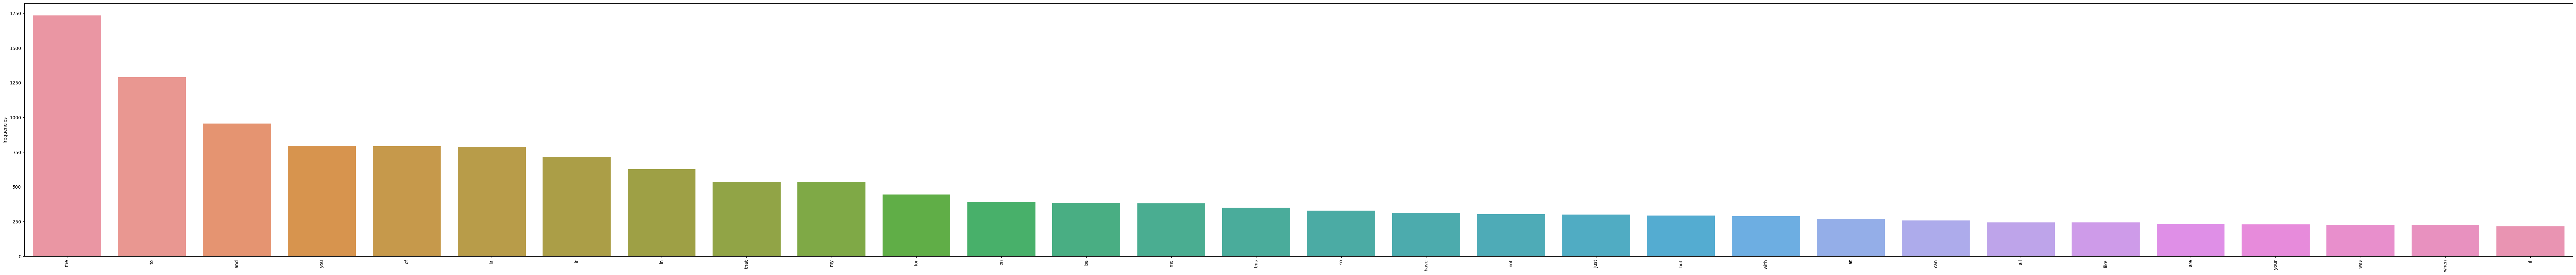

In [18]:
new_dataframe_test = pd.DataFrame(term_frequencies_test,
            index = count_vect_test.get_feature_names_out(),
            columns=['frequencies'])
# sort the data
new_dataframe_test = new_dataframe_test.sort_values(by = ['frequencies'],ascending=False)[0:30]
# draw
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=new_dataframe_test.index, 
            y=new_dataframe_test["frequencies"])
g.set_xticklabels(new_dataframe_test.index, rotation = 90)

In [19]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [20]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

## Exercise 2 (Take home):
1. import TfidfVectorizer
2. get vectorizer
3. get the feature
4. print the 100:110 feature

In [21]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzers (bag-of-words)
TF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TF_1000.fit(train_df['text'])

train_data_TF_features_1000 = TF_1000.transform(train_df['text'])

## check dimension
train_data_TF_features_1000.shape

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 1000)

In [22]:
train_data_TF_features_1000.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18054117, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07719722, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.33590386, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
feature_names_1000 = TF_1000.get_feature_names_out()
feature_names_1000[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

## Exercise 3 (Take home):

answer

For the accuracy part, the accuracy indicate the relation between the data and the predicted data.

Report show the detail of the above data.
precision : what's percent of our prediction are correct. 
recall : what's percent of the positive cases did we catch.
f1-score : what's percent of positive prediction are correct.
supprot : the numbers of the actual accurencies

Matrix
the diagonal indicated the correct cases which means the true answer is equals to the predicted answer.
the others are the false cases. each of them can be interpreted that the vertical line shows the true answer and the horizental lines shows the predicted answer.
so,

prediction anger to true anger = 57 cases (right)

prediction anger to true fear = 18 cases

prediction anger to true joy = 6 cases

prediction anger to true sadness = 3 cases

prediction fear to true anger = 16 cases

prediction fear to true fear = 76 cases (right)

prediction fear to true joy = 9 cases

prediction fear to true sadness = 9 cases

prediction joy to true anger = 6 cases

prediction joy to true fear = 9 cases

prediction joy to true joy = 56 cases (right)

prediction joy to true sadness = 8 cases

prediction sadness to true anger = 7 cases

prediction sadness to true fear = 13 cases

prediction sadness to true joy = 7 cases

prediction sadness to true sadness = 47 cases (right)

the accuracy = 0.68 = (sum of right cases) / 347

## Exercise 4 (Take home):

In [26]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [27]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [32]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

# accuracy
accuracy_score(y_test,y_pred)
print(classification_report(y_true=y_test, y_pred=y_pred))
confusion_matrix(y_true=y_test, y_pred=y_pred) 


Number of mislabeled points out of a total 347 points : 105
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



array([[55, 15,  5,  9],
       [ 9, 85,  5, 11],
       [11,  6, 56,  6],
       [12, 10,  6, 46]], dtype=int64)

## Exercise 5 (Take home):

answer here

How do the results from the Naive Bayes model and the Decision Tree model compare? 

In this case, the Naive Bayes model performs better than Decision tree, especially in predict fear.
take a look at in data, 
1. Naive Bayes has significantly better performance in fear and joy.
2. Decision has more balance accuracy in four prediction.
3. in Dicision tree case, more data won't help it have better accuracy.

 -> in decision tree, dependency has large influence. the greedy algorithm won't help the model get the best answer. It depends on the relation ship between the data. however, the large data won't have significantly positive influence.
 -> in Naive Bayes situation, it ignore the dependency and focus on the best answer, in this way, fear, which has the most data, have better performance than others. in the other way, those with small data like sadness perform worst.

## Exercise 6 (Take home):

plot the graph according to the data above.
accuracy and val accuracy. loss and val loss

In [35]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.363410,1.326216,0.432277,1.294145
1,1,0.659839,0.984959,0.628242,0.983688
2,2,0.789925,0.583433,0.674352,0.824673
3,3,0.853031,0.413916,0.685879,0.810878
4,4,0.889289,0.322550,0.691643,0.854308
5,5,0.909217,0.262481,0.691643,0.920954
6,6,0.929422,0.212910,0.694524,0.958379
7,7,0.941046,0.180703,0.691643,0.997427
8,8,0.951010,0.156228,0.700288,1.072308
9,9,0.957376,0.136213,0.682997,1.133036


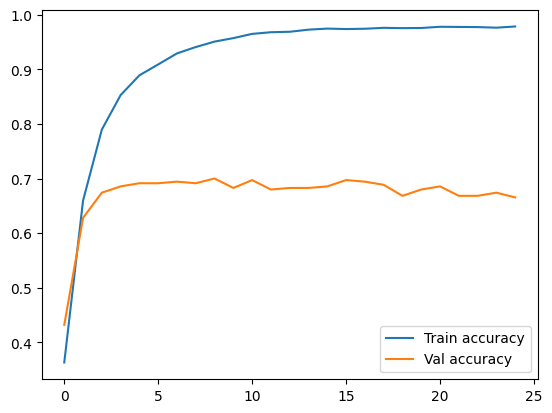

In [36]:
plt.plot(training_log['epoch'], training_log['accuracy'], label = "Train accuracy")
plt.plot(training_log['epoch'], training_log['val_accuracy'], label = "Val accuracy")
plt.legend()
plt.show()

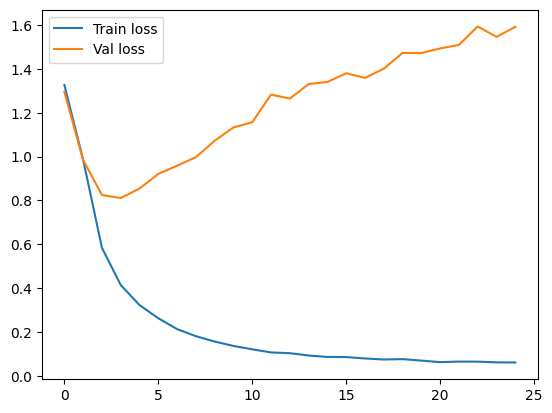

In [37]:
plt.plot(training_log['epoch'], training_log['loss'], label = "Train loss")
plt.plot(training_log['epoch'], training_log['val_loss'], label = "Val loss")
plt.legend()
plt.show()

## Exercise 7 (Take home):

in my opinion:
1. we have the word vector.
2. we can tokenize the sentence, analyze the preposition, conjunction with positive or negative.

for example make but as minus, and as plus.

then we have the word vector and conjunctive elements, we can analyze the sentence and train the model.

## Exercise 8 (Take home):

to generate 15 words with 60 words most, I change the topn to 14.

In [47]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [48]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 14
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said

In [50]:
from sklearn.manifold import TSNE

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


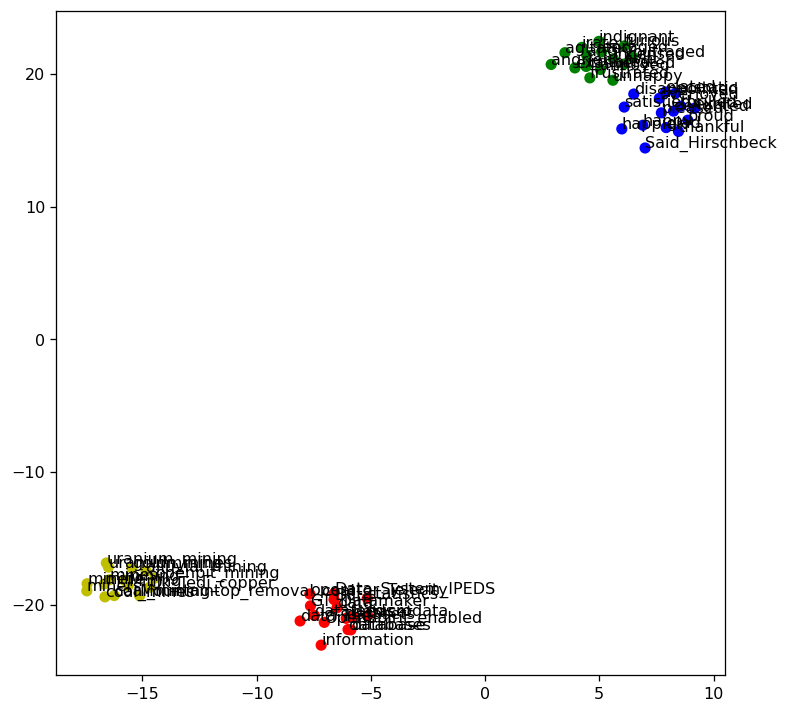

In [51]:
# Answer here
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()